In [1]:
using DynamicalSystems, Plots, LinearAlgebra
import Distributions: Normal

In [2]:
function Relu_vector(x)
    x[x .< 0] .= 0
    return x
end

Relu_vector([-1,2,3])

@inline @inbounds function CTLN(u, p, t)
    ϵ = p[1]; δ = p[2]; θ = p[3]; A = p[4];
    
    # We need to first make W
    
    n = size(A)[1]
    J = ones(n,n)
    j = ones(n,1)
    W = (-1+ϵ)*A + (-1-δ)*(J-I-A)
    x = []
    for i = 1:n
        x = [x; u[i]]
    end
    
    du = -x + Relu_vector(W*x + θ*j)
    
    return SVector{n}(du)
end

CTLN (generic function with 1 method)

In [3]:
normal = Normal(0,1) 
x = rand(normal, 5)
println(x)
norm(x, 2)

[0.5222815590127751, -0.29282964473467443, 0.5108754963385449, -0.7635762954766868, 0.44137380458056447]


1.182108537683079

In [4]:
rand()^(1/5)

0.8865101579535017

In [5]:
rand(5)/2

5-element Array{Float64,1}:
 0.4252994613204981
 0.2155204383612478
 0.3398082977127048
 0.2588256780390271
 0.4842794422971646

In [18]:
function sample_d_ball(R, d, center)

    u = rand(normal, d)
    magnitude = norm(u,2)
    rand_num = rand()
    r = rand()^(1/d)
    return R*(r*u)/(magnitude) + center
end

ball = zeros(1000,5)
for i in 1:1000
    point = sample_d_ball(0.1, 5, [0.5,0.5,0.5,0.5,0.5])
    ball[i,:] = point
end

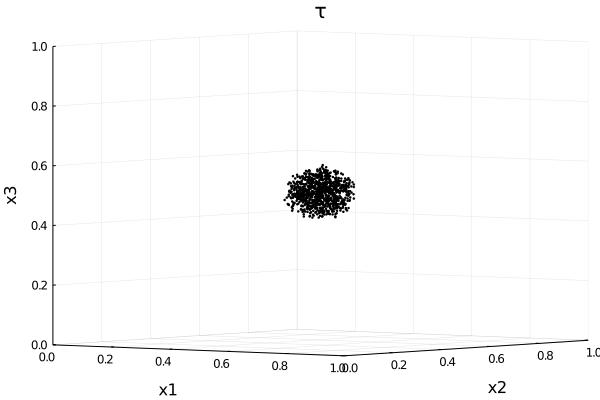

In [19]:
plot(ball[:,1],ball[:,2],ball[:,3], 
    seriestype = :scatter, 
    legend = false,
    xlim = (0,1),
    ylim = (0,1),
    zlim = (0,1),
    xlabel = "x1",
    ylabel = "x2",
    zlabel = "x3",
    markersize = 1.5,
    markercolor = :black,
    camera = (40,10),
    title = "τ")


In [20]:
# Baby Chaos

ϵ = 0.25
δ = 0.5
θ = 1
A = [0 0 1 0 0; 
     1 0 0 1 0;
     0 1 0 0 1;
     0 0 1 0 0;
     1 0 0 1 0]
x_0 = rand(size(A,1))

5-element Array{Float64,1}:
 0.17801028016579146
 0.05638660172068177
 0.16524229359300646
 0.8677632990307949
 0.5883878783707608

In [21]:
trajectories = []

for i = 1:size(ball,1)
    dsCTLN1 = ContinuousDynamicalSystem(CTLN, ball[i,:], [ϵ, δ, θ, A])
    tr = trajectory(dsCTLN1, 50, dt = 0.1)
    #tr = trajectory(dsCTLN1, 3, dt = 0.05)
    append!(trajectories, [tr])
end

In [22]:
function make_time_k(trajectories, k)
    output = []
    for i = 1:length(trajectories)
        append!(output, [trajectories[i][k,:]])
    end
    return output
end

function make_coordinate_k_vector(array_of_arrays, k)
    output = []
    for i = 1:length(array_of_arrays)
        append!(output, array_of_arrays[i][k])
    end
    return output
end

make_coordinate_k_vector (generic function with 1 method)

┌ Info: Saved animation to 
│   fn = /Users/JoshuaP/Desktop/chaotic networks/lyapunov_baby_chaos_50secs.gif
└ @ Plots /Users/JoshuaP/.julia/packages/Plots/YicDu/src/animation.jl:104


Plots.AnimatedGif("/Users/JoshuaP/Desktop/chaotic networks/lyapunov_baby_chaos_50secs.gif")
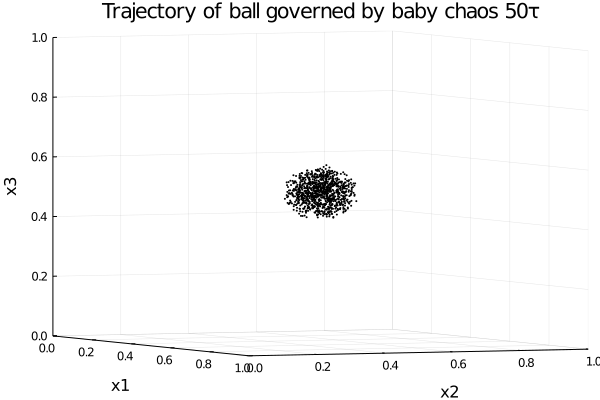

In [23]:
anim = @animate for k ∈ 1:size(trajectories[1],1)
    li = make_time_k(trajectories,k)
    x = make_coordinate_k_vector(li, 1)
    y = make_coordinate_k_vector(li, 2)
    z = make_coordinate_k_vector(li, 3)
    plot(x,y,z, 
    seriestype = :scatter, 
    legend = false,
    xlim = (0,1),
    ylim = (0,1),
    zlim = (0,1),
    xlabel = "x1",
    ylabel = "x2",
    zlabel = "x3",
    markersize = 1.5,
    markercolor = :black,
    camera = (60,10),
    title = "Trajectory of ball governed by baby chaos 50τ")
end
gif(anim, "lyapunov_baby_chaos_50secs.gif", fps = 15)

In [24]:
ϵ = 0.25
δ = 0.5
θ = 1
x_0 = rand(3)
A = [0 0 1; 1 0 0; 0 1 0]


3×3 Array{Int64,2}:
 0  0  1
 1  0  0
 0  1  0

In [25]:
ball = zeros(1000,3)
for i in 1:1000
    point = sample_d_ball(0.1, 3, [0.5,0.5,0.5])
    ball[i,:] = point
end

In [26]:
trajectories2 = []

for i = 1:size(ball,1)
    dsCTLN1 = ContinuousDynamicalSystem(CTLN, ball[i,:], [ϵ, δ, θ, A])
    tr = trajectory(dsCTLN1, 50, dt = 0.1)
    #tr = trajectory(dsCTLN1, 3, dt = 0.05)
    append!(trajectories2, [tr])
end

┌ Info: Saved animation to 
│   fn = /Users/JoshuaP/Desktop/chaotic networks/lyapunov_3_cycle_50secs.gif
└ @ Plots /Users/JoshuaP/.julia/packages/Plots/YicDu/src/animation.jl:104


Plots.AnimatedGif("/Users/JoshuaP/Desktop/chaotic networks/lyapunov_3_cycle_50secs.gif")
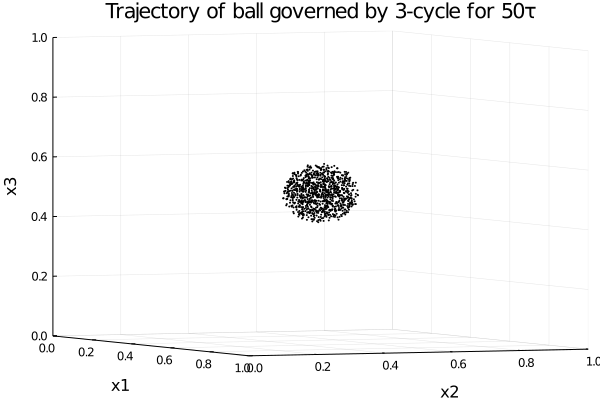

In [27]:
anim = @animate for k ∈ 1:size(trajectories2[1],1)
    li = make_time_k(trajectories2,k)
    x = make_coordinate_k_vector(li, 1)
    y = make_coordinate_k_vector(li, 2)
    z = make_coordinate_k_vector(li, 3)
    plot(x,y,z, 
    seriestype = :scatter, 
    legend = false,
    xlim = (0,1),
    ylim = (0,1),
    zlim = (0,1),
    xlabel = "x1",
    ylabel = "x2",
    zlabel = "x3",
    markersize = 1.5,
    markercolor = :black,
    camera = (60,10),
    title = "Trajectory of ball governed by 3-cycle for 50τ")
end
gif(anim, "lyapunov_3_cycle_50secs.gif", fps = 15)

In [ ]:
anim = @animate for k ∈ 1:size(trajectories2[1],1)
    li = make_time_k(trajectories2,k)
    x = make_coordinate_k_vector(li, 1)
    y = make_coordinate_k_vector(li, 2)
    z = make_coordinate_k_vector(li, 3)
    plot1 = plot(x,y,z, 
    seriestype = :scatter, 
    legend = false,
    xlim = (0,1),
    ylim = (0,1),
    zlim = (0,1),
    xlabel = "x1",
    ylabel = "x2",
    zlabel = "x3",
    markersize = 1.5,
    markercolor = :black,
    camera = (60,10),
    title = "Trajectory of ball governed by 3-cycle 50τ")
    
    li = make_time_k(trajectories,k)
    x = make_coordinate_k_vector(li, 1)
    y = make_coordinate_k_vector(li, 2)
    z = make_coordinate_k_vector(li, 3)
    plot2 = plot(x,y,z, 
    seriestype = :scatter, 
    legend = false,
    xlim = (0,1),
    ylim = (0,1),
    zlim = (0,1),
    xlabel = "x1",
    ylabel = "x2",
    zlabel = "x3",
    markersize = 1.5,
    markercolor = :black,
    camera = (60,10),
    title = "Trajectory of ball governed by baby chaos 50τ")
    
    plot(plot1, plot2, 
        layout = (1, 2), 
        legend = false,
        size=(1000,400))
end
gif(anim, "lyapunov_side_by_side.gif", fps = 15)

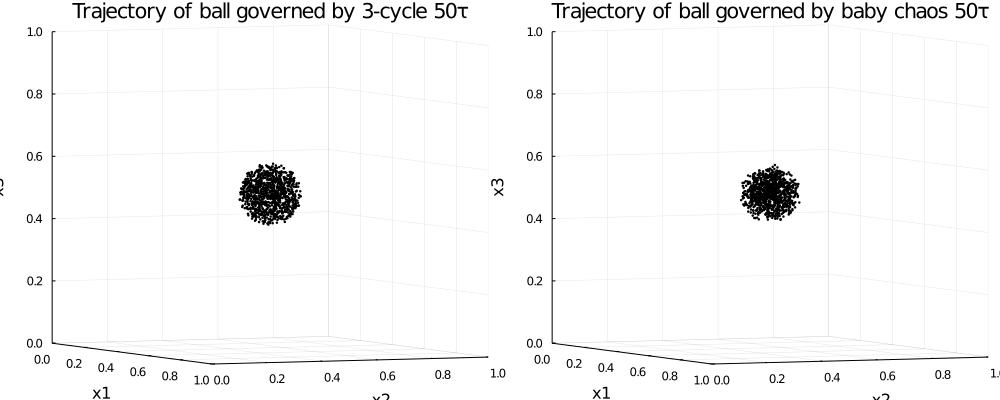

In [52]:
    li = make_time_k(trajectories2,k)
    x = make_coordinate_k_vector(li, 1)
    y = make_coordinate_k_vector(li, 2)
    z = make_coordinate_k_vector(li, 3)
    plot1 = plot(x,y,z, 
    seriestype = :scatter, 
    legend = false,
    xlim = (0,1),
    ylim = (0,1),
    zlim = (0,1),
    xlabel = "x1",
    ylabel = "x2",
    zlabel = "x3",
    markersize = 1.5,
    markercolor = :black,
    camera = (60,10),
    title = "Trajectory of ball governed by 3-cycle 50τ")
    
    li = make_time_k(trajectories,k)
    x = make_coordinate_k_vector(li, 1)
    y = make_coordinate_k_vector(li, 2)
    z = make_coordinate_k_vector(li, 3)
    plot2 = plot(x,y,z, 
    seriestype = :scatter, 
    legend = false,
    xlim = (0,1),
    ylim = (0,1),
    zlim = (0,1),
    xlabel = "x1",
    ylabel = "x2",
    zlabel = "x3",
    markersize = 1.5,
    markercolor = :black,
    camera = (60,10),
    title = "Trajectory of ball governed by baby chaos 50τ")
    
    plot(plot1, plot2, 
        layout = (1, 2), 
        legend = false,
        size=(1000,400))

In [93]:
#Trajectory 

ball = zeros(2,3)
for i in 1:2
    point = sample_d_ball(0.001, 3, [0.3,0.4,0.3])
    ball[i,:] = point
end

In [94]:
distance(ball[1,:], ball[2,:])

0.0007979134944503364

In [95]:
function distance(x1, x2)
    return norm(x1 - x2)
end

distance (generic function with 1 method)

In [96]:
trajectories = []

for i = 1:size(ball,1)
    dsCTLN1 = ContinuousDynamicalSystem(CTLN, ball[i,:], [ϵ, δ, θ, A])
    tr = trajectory(dsCTLN1, 100, dt = 0.1)
    #tr = trajectory(dsCTLN1, 3, dt = 0.05)
    append!(trajectories, [tr])
end

In [97]:
data = []
for i = 1:size(trajectories[1],1)
    append!(data, distance(trajectories[1][i,:], trajectories[2][i,:]))
end

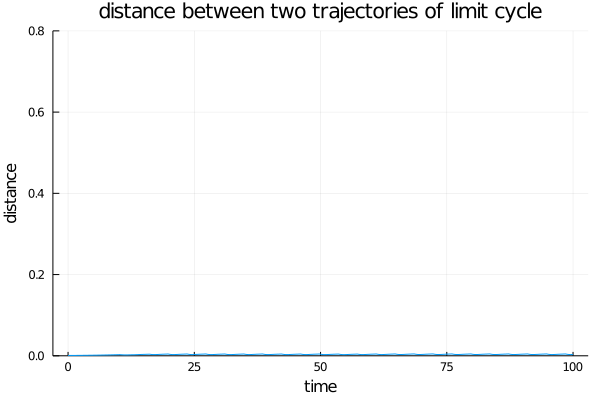

In [100]:
t = 0:0.1:100
plot(t, data, legend = false,
    xlabel = "time",
    ylabel = "distance",
    title = "distance between two trajectories of limit cycle",
    ylim = (0,0.8))

In [101]:
# Baby Chaos

ϵ = 0.25
δ = 0.5
θ = 1
A = [0 0 1 0 0; 
     1 0 0 1 0;
     0 1 0 0 1;
     0 0 1 0 0;
     1 0 0 1 0]
x_0 = rand(size(A,1))

5-element Array{Float64,1}:
 0.6765956772795712
 0.9354509485195819
 0.832808297825514
 0.6895885130578603
 0.8236138417272081

In [102]:
trajectories = []
ball = zeros(2,5)
for i in 1:2
    point = sample_d_ball(0.001, 5, [0.5,0.5,0.5,0.5,0.5])
    ball[i,:] = point
end

for i = 1:size(ball,1)
    dsCTLN1 = ContinuousDynamicalSystem(CTLN, ball[i,:], [ϵ, δ, θ, A])
    tr = trajectory(dsCTLN1, 100, dt = 0.1)
    #tr = trajectory(dsCTLN1, 3, dt = 0.05)
    append!(trajectories, [tr])
end

In [103]:
data = []
for i = 1:size(trajectories[1],1)
    append!(data, distance(trajectories[1][i,:], trajectories[2][i,:]))
end

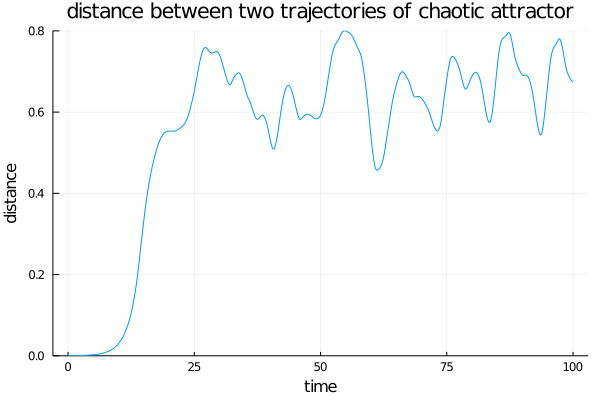

In [105]:
t = 0:0.1:100
plot(t, data, legend = false,
    xlabel = "time",
    ylabel = "distance",
    title = "distance between two trajectories of chaotic attractor",
    ylim = (0,0.8))